In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pandas.plotting import autocorrelation_plot

# Add the src directory to Python path
sys.path.append(os.path.abspath('../src'))

# If you haven't created these modules yet, you can comment out these lines
# and include the functions directly in this notebook
# from data.fetch_data import fetch_stock_data
# from visualization.plot_utils import plot_time_series, plot_monthly_average, plot_yearly_trend, plot_distribution

%matplotlib inline
plt.style.use('ggplot')

In [22]:
import yfinance as yf

def fetch_stock_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df = df.reset_index()
    df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
    return df[['ds', 'y']]

def plot_time_series(df, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15, 7))
    plt.plot(df[x], df[y])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_monthly_average(df, title):
    monthly_avg = df.groupby(df['ds'].dt.month)['y'].mean()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel('Average Price (USD)')
    plt.show()

def plot_yearly_trend(df, title):
    yearly_avg = df.groupby(df['ds'].dt.year)['y'].mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Average Price (USD)')
    plt.show()

def plot_distribution(df, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['y'], kde=True)
    plt.title(title)
    plt.xlabel('Price (USD)')
    plt.ylabel('Frequency')
    plt.show()

In [24]:
# Fetch the data
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2023-07-16"
df = fetch_stock_data(ticker, start_date, end_date)

print(df.head())
print(df.info())

[*********************100%%**********************]  1 of 1 completed

          ds         y
0 2010-01-04  7.643214
1 2010-01-05  7.656429
2 2010-01-06  7.534643
3 2010-01-07  7.520714
4 2010-01-08  7.570714
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3405 non-null   datetime64[ns]
 1   y       3405 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 53.3 KB
None


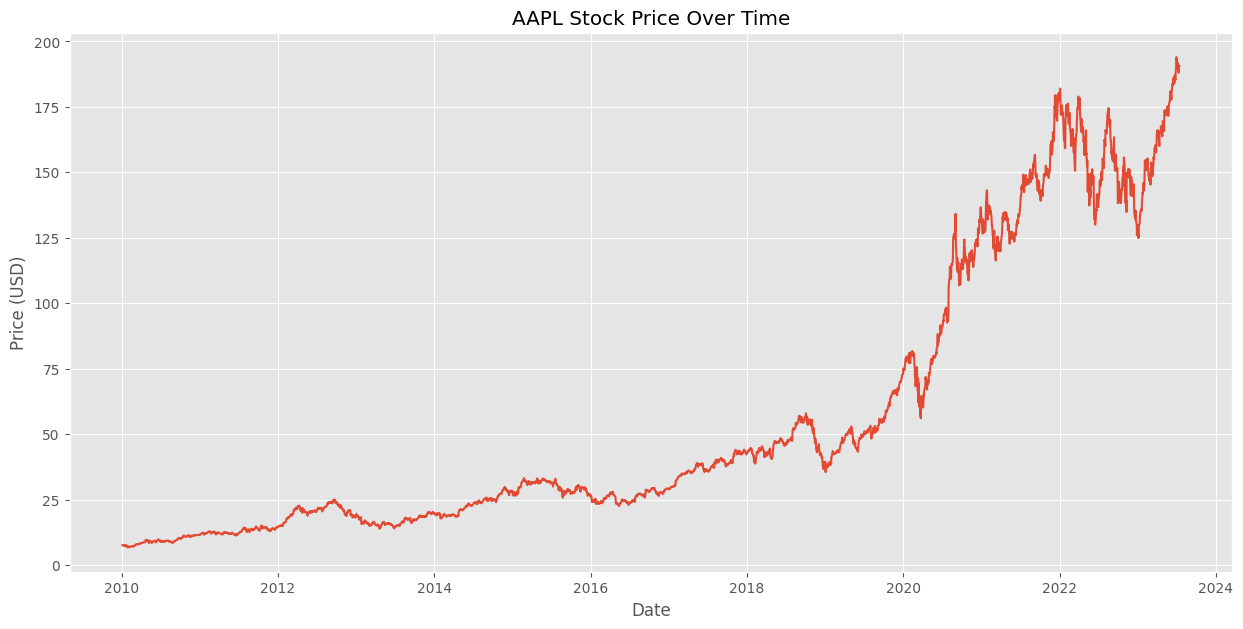

In [25]:
plot_time_series(df, 'ds', 'y', f'{ticker} Stock Price Over Time', 'Date', 'Price (USD)')

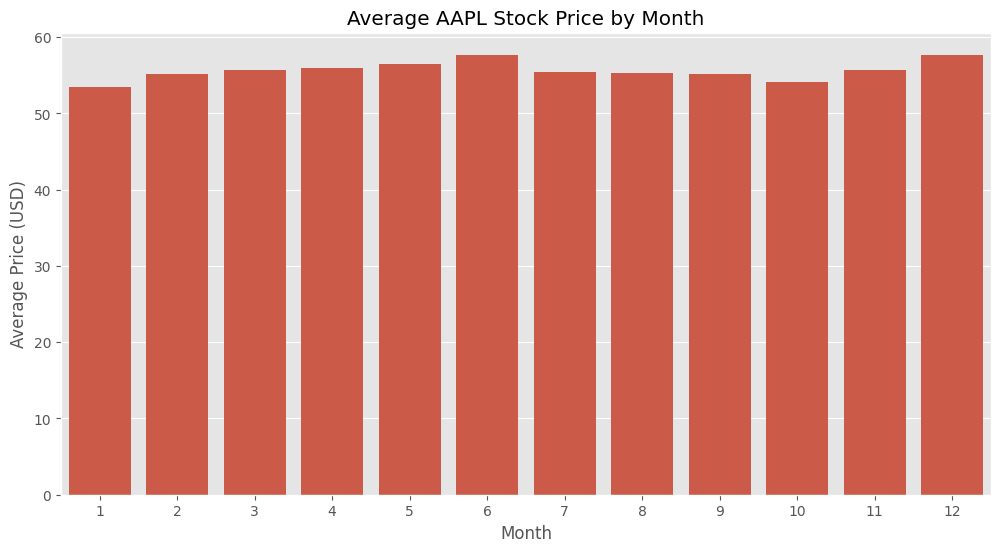

In [26]:
plot_monthly_average(df, f'Average {ticker} Stock Price by Month')

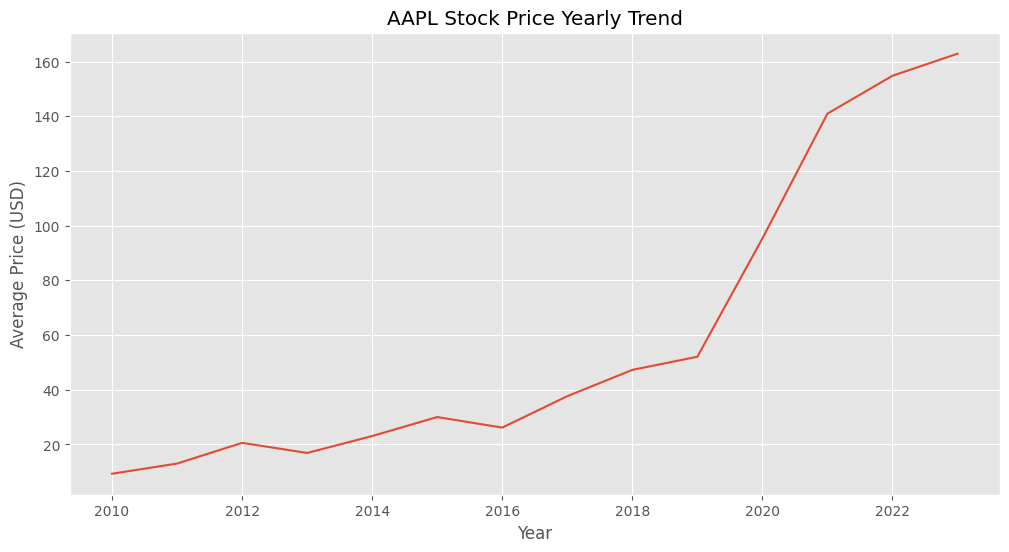

In [28]:
plot_yearly_trend(df, f'{ticker} Stock Price Yearly Trend')

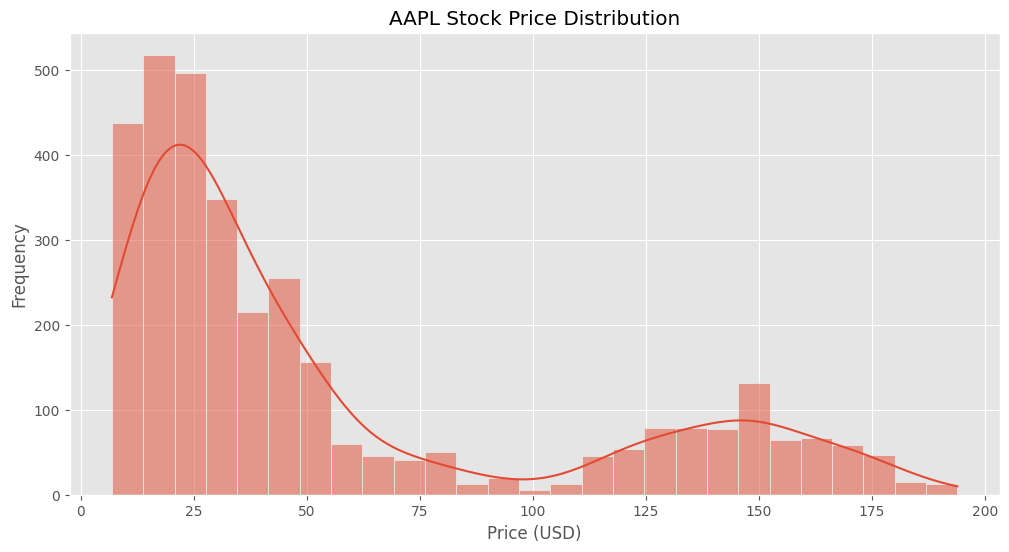

In [29]:
plot_distribution(df, f'{ticker} Stock Price Distribution')

In [30]:
print(df['y'].describe())

count    3405.000000
mean       55.679465
std        51.323927
min         6.858929
25%        19.277857
50%        31.542500
75%        72.267502
max       193.970001
Name: y, dtype: float64


In [31]:
df['time_index'] = range(len(df))
correlation = df['y'].corr(df['time_index'])
print(f"Correlation between price and time: {correlation}")

Correlation between price and time: 0.8748161918543952


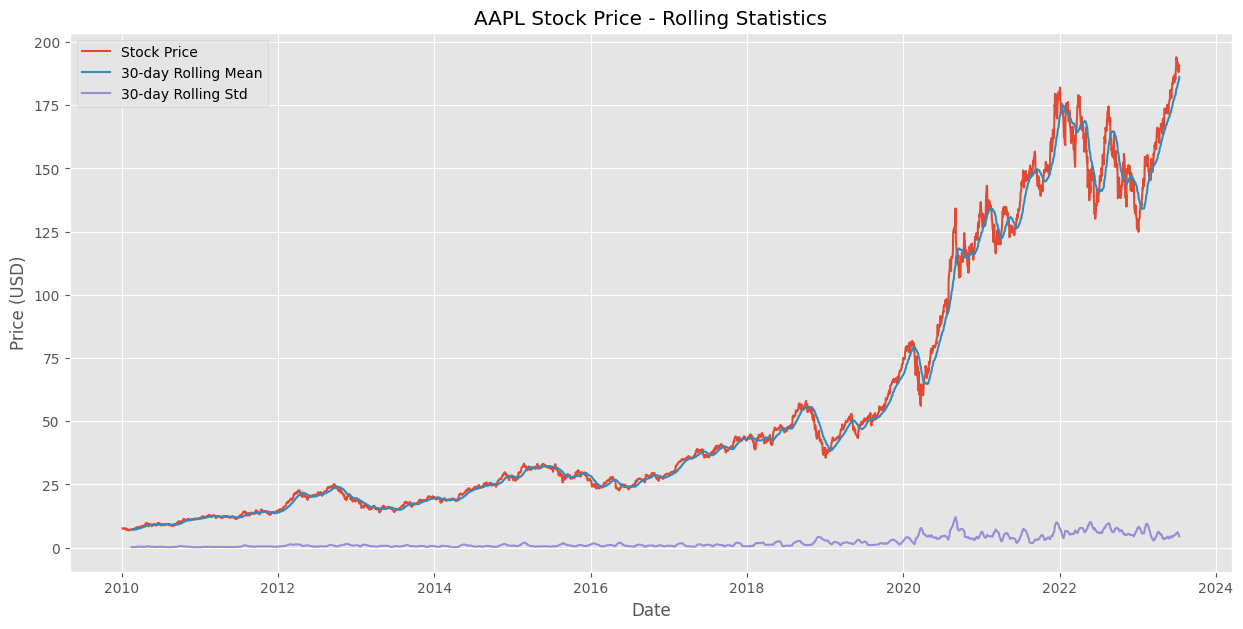

In [32]:
# Calculate rolling mean and standard deviation
rolling_mean = df['y'].rolling(window=30).mean()
rolling_std = df['y'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(15, 7))
plt.plot(df['ds'], df['y'], label='Stock Price')
plt.plot(df['ds'], rolling_mean, label='30-day Rolling Mean')
plt.plot(df['ds'], rolling_std, label='30-day Rolling Std')
plt.title(f'{ticker} Stock Price - Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

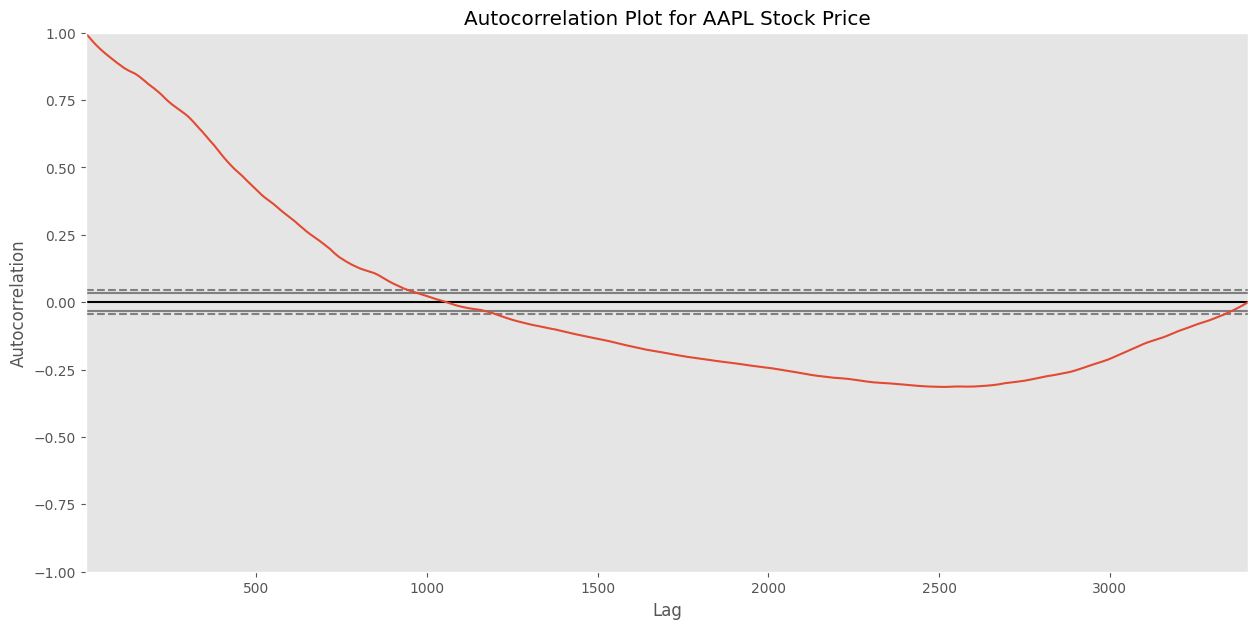

In [33]:
plt.figure(figsize=(15, 7))
autocorrelation_plot(df['y'])
plt.title(f'Autocorrelation Plot for {ticker} Stock Price')
plt.show()

In [35]:
print("""
Based on this exploratory data analysis, we can observe:

1. The overall trend of the stock price
2. Any seasonal patterns in the monthly averages
3. The distribution of stock prices
4. The correlation between price and time
5. The rolling statistics which show how the mean and standard deviation change over time
6. The autocorrelation which indicates how the stock price is correlated with its past values

These insights will be valuable when we move to the modeling phase, particularly in choosing appropriate parameters for our Prophet model.
""")


Based on this exploratory data analysis, we can observe:

1. The overall trend of the stock price
2. Any seasonal patterns in the monthly averages
3. The distribution of stock prices
4. The correlation between price and time
5. The rolling statistics which show how the mean and standard deviation change over time
6. The autocorrelation which indicates how the stock price is correlated with its past values

These insights will be valuable when we move to the modeling phase, particularly in choosing appropriate parameters for our Prophet model.

